In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


world_bank_data = pd.read_csv("../data/processed/world_bank.csv")
print(world_bank_data[['control_of_corruption_estimate', 'control_of_corruption_std',
                       'gini_index', 'political_stability_estimate',
                       'rule_of_law_estimate']].describe())

KeyError: "['human_capital_index'] not in index"

In [4]:
print(world_bank_data.isnull().sum())

country                                    0
date                                       0
agricultural_land%                        73
forest_land%                              73
avg_precipitation                        140
trade_in_services%                        23
control_of_corruption_estimate            16
control_of_corruption_std                 16
access_to_electricity%                    71
renewvable_energy_consumption%           108
CO2_emisions                             108
population_density                        73
inflation_annual%                         18
research_and_development_expenditure%    113
expense%                                 100
goverment_effectiveness_estimate          17
military_expenditure%                     37
political_stability_estimate              20
rule_of_law_estimate                      16
regulatory_quality_estimate               18
government_expenditure_on_education%     120
government_health_expenditure%           109
gini_index

In [6]:
numeric_columns = world_bank_data.drop(columns=['country', 'date'])
correlation_matrix = numeric_columns.corr()

# Sort the correlations with 'control_of_corruption_estimate'
sorted_correlation = correlation_matrix['control_of_corruption_estimate'].sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlation)

control_of_corruption_estimate           1.000000
rule_of_law_estimate                     0.965431
goverment_effectiveness_estimate         0.962257
regulatory_quality_estimate              0.923980
voice_and_accountability_estimate        0.909015
life_expectancy_at_birth                 0.708359
political_stability_estimate             0.688979
research_and_development_expenditure%    0.656002
government_health_expenditure%           0.637443
government_expenditure_on_education%     0.603916
avg_precipitation                        0.321286
access_to_electricity%                   0.297986
population_density                       0.284521
control_of_corruption_std                0.266735
trade_in_services%                       0.263662
renewvable_energy_consumption%           0.214486
expense%                                 0.051125
birth_rate                               0.048323
forest_land%                            -0.061293
agricultural_land%                      -0.136017


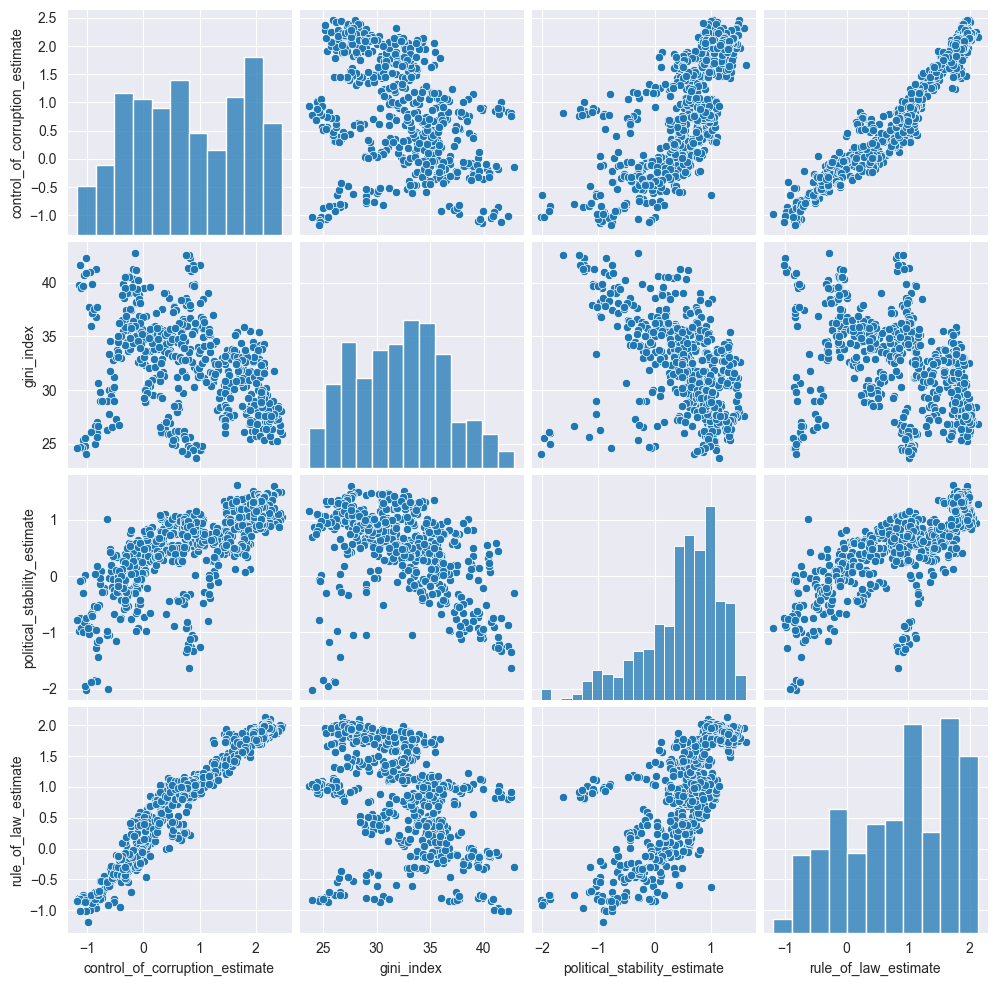

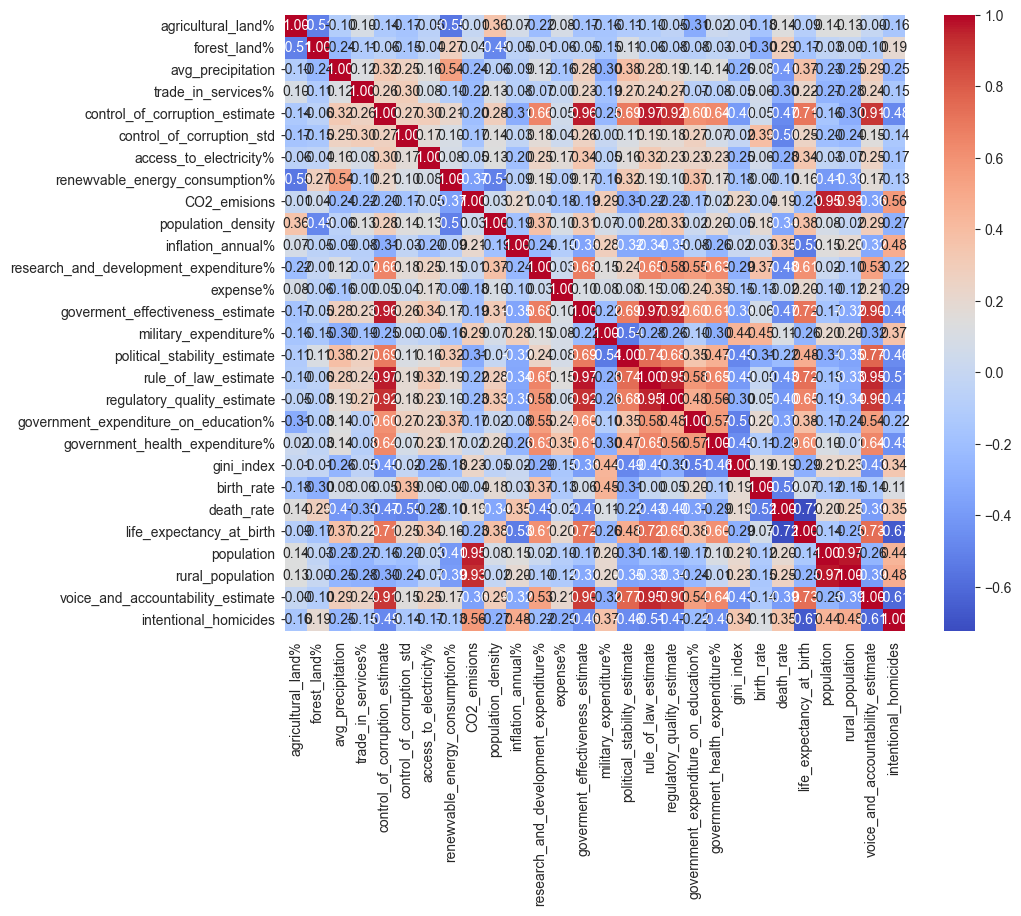

In [7]:
# Pairplot for key features
sns.pairplot(world_bank_data, vars=['control_of_corruption_estimate', 'gini_index',
                                    'political_stability_estimate', 'rule_of_law_estimate'])
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()
